In [1]:
import requests
import pendulum
from pathlib import Path

In [4]:
#url_base = 'https://nomads.ncep.noaa.gov/pub/data/nccf/com/cfs/prod'
url_base = 'https://noaa-cfs-pds.s3.amazonaws.com'
diretorio_saida = 'teste'

In [5]:
data = '20220918'   #'20220919'
data_ = pendulum.from_format(data, "YYYYMMDD")

In [ ]:
'https://nomads.ncep.noaa.gov/pub/data/nccf/com/cfs/prod/'
'cfs.20220919/00/monthly_grib_01/ocnf.01.2022091900.202301.avrg.grib.grb2'

In [6]:
def download_file_cfs(data_ft, dia_ensemble, ciclo, RR):
    
    url_pt2 = f'cfs.{data_ft}/{ciclo}/monthly_grib_{RR}'
    arquivo = f'ocnf.{RR}.{data_ft}{ciclo}.{dia_ensemble.add(months=lead).format("YYYYMM")}.avrg.grib.grb2'
    url=f'{url_base}/{url_pt2}/{arquivo}'

    resp=requests.get(url)

    if resp.status_code == 200:
        resp=requests.get(url).content
        diretorio = Path(diretorio_saida, arquivo)

        with open(diretorio, "wb") as arquivo_:
            arquivo_.write(resp)
            print(f"{arquivo} [ok]")
    else: 
        print(f"{arquivo} {ciclo} [não disponível]")

In [ ]:
for day_ensemble in range(0,9+1): #0,10
    dia_ensemble = data_.subtract(days=day_ensemble)

    for lead in range(0,9+1):        
        data_ft = dia_ensemble.format("YYYYMMDD")
        
        for ciclo in ['18', '12', '06', '00']:
            if ciclo=='00':
                for rr in ['01', '02', '03', '04']:
                    download_file_cfs(data_ft, dia_ensemble, ciclo, rr)
            else:
                rr = '01'
                download_file_cfs(data_ft, dia_ensemble, ciclo, rr)

ocnf.01.2022091818.202209.avrg.grib.grb2 [ok]
ocnf.01.2022091812.202209.avrg.grib.grb2 [ok]
ocnf.01.2022091806.202209.avrg.grib.grb2 [ok]
ocnf.01.2022091800.202209.avrg.grib.grb2 [ok]
ocnf.02.2022091800.202209.avrg.grib.grb2 [ok]
ocnf.03.2022091800.202209.avrg.grib.grb2 [ok]
ocnf.04.2022091800.202209.avrg.grib.grb2 [ok]
ocnf.01.2022091818.202210.avrg.grib.grb2 [ok]
ocnf.01.2022091812.202210.avrg.grib.grb2 [ok]
ocnf.01.2022091806.202210.avrg.grib.grb2 [ok]
ocnf.01.2022091800.202210.avrg.grib.grb2 [ok]
ocnf.02.2022091800.202210.avrg.grib.grb2 [ok]
ocnf.03.2022091800.202210.avrg.grib.grb2 [ok]
ocnf.04.2022091800.202210.avrg.grib.grb2 [ok]
ocnf.01.2022091818.202211.avrg.grib.grb2 [ok]
ocnf.01.2022091812.202211.avrg.grib.grb2 [ok]
ocnf.01.2022091806.202211.avrg.grib.grb2 [ok]
ocnf.01.2022091800.202211.avrg.grib.grb2 [ok]
ocnf.02.2022091800.202211.avrg.grib.grb2 [ok]
ocnf.03.2022091800.202211.avrg.grib.grb2 [ok]
ocnf.04.2022091800.202211.avrg.grib.grb2 [ok]
ocnf.01.2022091818.202212.avrg.gri

In [3]:
import xarray as xr
import pandas as pd

In [8]:
dado = 'arquivos_teste/ocnf.01.2022091000.202306.avrg.grib.grb2'

In [ ]:
lista = []

for i in range():

In [5]:
xr.open_dataset(dado, filter_by_keys={'typeOfLevel': 'surface'}, engine='cfgrib')

<xarray.Dataset>
Dimensions:     (latitude: 181, longitude: 360)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
    valid_time  datetime64[ns] ...
Data variables:
    uflx        (latitude, longitude) float32 ...
    vflx        (latitude, longitude) float32 ...
    sshg        (latitude, longitude) float32 ...
    siconc      (latitude, longitude) float32 ...
    unknown     (latitude, longitude) float32 ...
    sde         (latitude, longitude) float32 ...
    t           (latitude, longitude) float32 ...
    emnp        (latitude, longitude) float32 ...
    thflx       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-09-19T17:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
datasets = list()

        for membro in self.arquivos_locais.keys():
            arquivos_membro = self.arquivos_locais[membro]

            dataset_membro = xr.open_mfdataset(
                arquivos_membro,
                concat_dim="valid_time",
                combine="nested",
                backend_kwargs={
                    "filter_by_keys": {
                        "typeOfLevel": "surface",
                        "shortName": "t",
                    },
                },
            )
            dataset_membro = dataset_membro.assign_coords({self.nome_membro: membro})
            dataset_membro = dataset_membro.expand_dims(self.nome_membro)
            datasets.append(dataset_membro)

        dataset = xr.concat(datasets, dim=self.nome_membro)

In [ ]:
dataset = xr.open_mfdataset('arquivos_teste2/*.202210.avrg.grib.00Z.grb2', concat_dim="valid_time", combine="nested",
                data_vars='minimal', coords='minimal', compat='override',
                backend_kwargs={
                    "filter_by_keys": {
                        "typeOfLevel": "surface",
                        "shortName": "t",
                    },
                 },
                parallel=True)

In [5]:
tsm = dataset.groupby('valid_time.month').mean()

In [6]:
dataset

<xarray.Dataset>
Dimensions:     (latitude: 181, longitude: 360, valid_time: 40)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude   (longitude) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * valid_time  (valid_time) datetime64[ns] 2022-11-09 ... 2022-11-18T18:00:00
Data variables:
    t           (valid_time, latitude, longitude) float32 dask.array<chunksize=(1, 181, 360), meta=np.ndarray>
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          4
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2022-09-20T11:46 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
latitude=(5, -5)
longitude=(-170, -120)


In [ ]:

rec = dataset.t.sel(
        latitude=slice(latitude[0], latitude[1]),
        longitude=slice(longitude[0], longitude[1]),
    ).mean(dim=["lat", "lon"])

In [8]:
import recorta_dado

In [9]:
tsm_nino = recorta_dado.main(dataset.t,
            contorno_tipo='lat_lon',
            tipo='grib',
            latitude=[ latitude[0], latitude[1]], 
            longitude=[ longitude[0], longitude[1] ]
            )

In [10]:
tsm_recortada = tsm_nino.mean(dim=["latitude", "longitude"])

In [11]:
tsm_nino

<xarray.DataArray 't' (valid_time: 40, latitude: 11, longitude: 51)>
dask.array<getitem, shape=(40, 11, 51), dtype=float32, chunksize=(1, 11, 51), chunktype=numpy.ndarray>
Coordinates:
    time         datetime64[ns] ...
    step         timedelta64[ns] ...
    surface      float64 ...
  * latitude     (latitude) float64 5.0 4.0 3.0 2.0 1.0 ... -2.0 -3.0 -4.0 -5.0
  * longitude    (longitude) float64 -170.0 -169.0 -168.0 ... -121.0 -120.0
  * valid_time   (valid_time) datetime64[ns] 2022-11-09 ... 2022-11-18T18:00:00
    spatial_ref  int64 0
Attributes:
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      65160
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            avg
    GRIB_gridType:                            regular_ll
    GRIB_NV:                                  0
    GRIB_Nx:                                  360
    GRIB_Ny:                                  181
    GRIB_cfName:                              air_temperature
    GRIB_cfVarName:                           t
    GRIB_gridDefinitionDescription:           Latitude/longitude. Also called...
    GRIB_iDirectionIncrementInDegrees:        1.0
    GRIB_iScansNegatively:                    0
    GRIB_jDirectionIncrementInDegrees:        1.0
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    0
    GRIB_latitudeOfFirstGridPointInDegrees:   90.0
    GRIB_latitudeOfLastGridPointInDegrees:    -90.0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   359.0
    GRIB_missingValue:                        9999
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [12]:
valores = tsm_recortada.compute()

In [13]:
valores

<xarray.DataArray 't' (valid_time: 40)>
array([298.5463 , 298.56012, 298.7205 , 298.65372, 298.9409 , 298.7066 ,
       298.71667, 298.68634, 298.72678, 298.72318, 298.8406 , 298.6574 ,
       298.75064, 298.59833, 298.8016 , 298.69574, 298.72223, 298.78247,
       298.77585, 298.83734, 298.78067, 298.77246, 298.9635 , 298.7696 ,
       298.8359 , 298.75876, 298.7952 , 298.80124, 298.82748, 298.91446,
       298.79196, 298.8281 , 298.75412, 298.73907, 298.71725, 298.69785,
       298.62613, 298.6584 , 298.7367 , 298.7062 ], dtype=float32)
Coordinates:
    time         datetime64[ns] 2022-09-10
    step         timedelta64[ns] 60 days
    surface      float64 0.0
  * valid_time   (valid_time) datetime64[ns] 2022-11-09 ... 2022-11-18T18:00:00
    spatial_ref  int64 0

In [14]:
valoresc = valores - 273.15

In [15]:
valoresc

<xarray.DataArray 't' (valid_time: 40)>
array([25.396301, 25.410126, 25.570496, 25.503723, 25.790894, 25.55661 ,
       25.56668 , 25.536346, 25.576782, 25.573181, 25.690613, 25.507416,
       25.600647, 25.448334, 25.651611, 25.545746, 25.572235, 25.632477,
       25.625854, 25.687347, 25.630676, 25.622467, 25.813507, 25.619598,
       25.685913, 25.608765, 25.645203, 25.651245, 25.67749 , 25.764465,
       25.641968, 25.6781  , 25.604126, 25.58908 , 25.56726 , 25.547852,
       25.476135, 25.508392, 25.5867  , 25.556213], dtype=float32)
Coordinates:
    time         datetime64[ns] 2022-09-10
    step         timedelta64[ns] 60 days
    surface      float64 0.0
  * valid_time   (valid_time) datetime64[ns] 2022-11-09 ... 2022-11-18T18:00:00
    spatial_ref  int64 0

In [16]:
valores_anom = valoresc - 26.68

In [17]:
valores_anom

<xarray.DataArray 't' (valid_time: 40)>
array([-1.283699  , -1.2698746 , -1.1095047 , -1.1762772 , -0.88910675,
       -1.1233902 , -1.1133194 , -1.1436539 , -1.1032181 , -1.1068192 ,
       -0.9893875 , -1.1725845 , -1.0793533 , -1.2316666 , -1.028389  ,
       -1.1342545 , -1.1077652 , -1.0475235 , -1.0541458 , -0.9926529 ,
       -1.049324  , -1.0575333 , -0.8664932 , -1.0604019 , -0.9940872 ,
       -1.0712357 , -1.0347977 , -1.0287552 , -1.0025101 , -0.915535  ,
       -1.0380325 , -1.0018997 , -1.0758743 , -1.0909195 , -1.1127396 ,
       -1.1321487 , -1.203865  , -1.171608  , -1.0932999 , -1.1237869 ],
      dtype=float32)
Coordinates:
    time         datetime64[ns] 2022-09-10
    step         timedelta64[ns] 60 days
    surface      float64 0.0
  * valid_time   (valid_time) datetime64[ns] 2022-11-09 ... 2022-11-18T18:00:00
    spatial_ref  int64 0

In [57]:
nino34 = pd.read_csv('historico_nino34.csv')
clima = pd.read_csv('clima_ninos.csv', sep=';', index_col='mes')

In [54]:
valoresc - clima.nino34[10]

<xarray.DataArray 't' (valid_time: 40)>
array([-1.3136978 , -1.2998734 , -1.1395035 , -1.2062759 , -0.9191055 ,
       -1.153389  , -1.1433182 , -1.1736526 , -1.1332169 , -1.1368179 ,
       -1.0193863 , -1.2025833 , -1.1093521 , -1.2616653 , -1.0583878 ,
       -1.1642532 , -1.137764  , -1.0775223 , -1.0841446 , -1.0226517 ,
       -1.0793228 , -1.087532  , -0.896492  , -1.0904007 , -1.024086  ,
       -1.1012344 , -1.0647964 , -1.058754  , -1.0325089 , -0.94553375,
       -1.0680313 , -1.0318985 , -1.1058731 , -1.1209183 , -1.1427383 ,
       -1.1621475 , -1.2338638 , -1.2016068 , -1.1232986 , -1.1537857 ],
      dtype=float32)
Coordinates:
    time         datetime64[ns] 2022-09-10
    step         timedelta64[ns] 60 days
    surface      float64 0.0
  * valid_time   (valid_time) datetime64[ns] 2022-11-09 ... 2022-11-18T18:00:00
    spatial_ref  int64 0

In [20]:
nino34 = nino34.set_index('time')

In [58]:
nino34

,time,anom
0,2021-10-01,-0.796554
1,2021-11-01,-0.854338
2,2021-12-01,-1.052910
3,2022-01-01,-0.834186
4,2022-02-01,-0.731204
5,2022-03-01,-0.892223
6,2022-04-01,-0.977064
7,2022-05-01,-1.065688
8,2022-06-01,-0.683014
9,2022-07-01,-0.619885


In [22]:
import matplotlib.pyplot as plt

In [ ]:
clima

In [23]:
indice_data = pd.to_datetime(nino34.index, format='%Y.%m.%d')

In [62]:
ninoteste = nino34

In [63]:
ninoteste

,time,anom
0,2021-10-01,-0.796554
1,2021-11-01,-0.854338
2,2021-12-01,-1.052910
3,2022-01-01,-0.834186
4,2022-02-01,-0.731204
5,2022-03-01,-0.892223
6,2022-04-01,-0.977064
7,2022-05-01,-1.065688
8,2022-06-01,-0.683014
9,2022-07-01,-0.619885


In [65]:
new_row = pd.Series({'index': '2022-10-01', 'anom': valores_anom[0].values})
df2 = pd.DataFrame([['2022-10-01',valores_anom[0].values]],
                   columns=['time', 'anom'])

In [60]:
df2

,index,anom
0,2022-10-01,-1.283699


In [67]:
nino34c = pd.concat([ninoteste, df2])
#pd.concat([df7, new_row.to_frame().T], ignore_index=True)

In [73]:
indice_data = pd.to_datetime(nino34c.time, format='%Y.%m.%d')

In [74]:
indice_data

0    2021-10-01
1    2021-11-01
2    2021-12-01
3    2022-01-01
4    2022-02-01
5    2022-03-01
6    2022-04-01
7    2022-05-01
8    2022-06-01
9    2022-07-01
10   2022-08-01
11   2022-09-01
0    2022-10-01
Name: time, dtype: datetime64[ns]

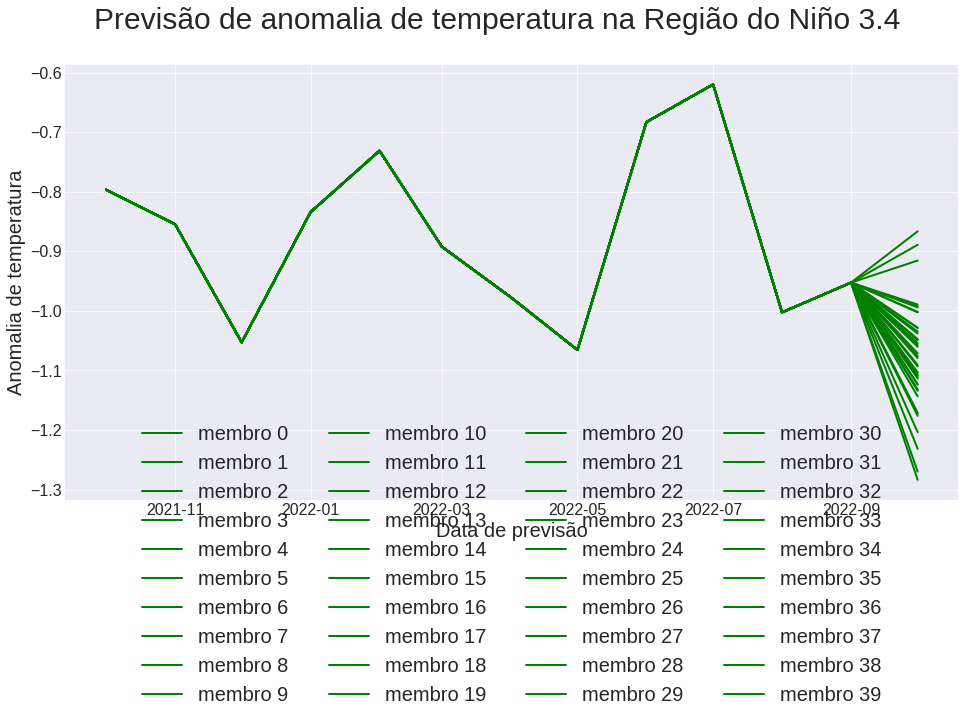

In [76]:
# Change the style of plot
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax = plt.subplots(figsize=(16,8))
plt.suptitle('Previsão de anomalia de temperatura na Região do Niño 3.4', fontsize=30)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

ax.set_ylabel('Anomalia de temperatura', fontsize=20)
ax.set_xlabel('Data de previsão', fontsize=20)

for i in range(0,40):
    ninoteste = nino34
    df2 = pd.DataFrame([['2022-10-01',valores_anom[i].values]],
                       columns=['time', 'anom'])
    
    nino34c = pd.concat([ninoteste, df2])

    ax.plot(indice_data, nino34c.anom.values, 'g', label=f'membro {i}', linewidth=2)
#ax.plot(indice_data, nino12_2.anomalia.values, 'b', label='membro 2')
#ax.plot(indice_data, nino12_3.anomalia.values, 'r', label='membro 3')
#ax.plot(indice_data, nino12_4.anomalia.values, 'y', label='membro 4')

# And add a special annotation for the group we are interested in
#plt.text(10.2, nino12_1.anomalia.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
plt.legend(loc='center', fontsize=20, ncols=4, bbox_to_anchor=(0.5, -0.15))

#plt.savefig('teste', facecolor="white", bbox_inches="tight", dpi=300)

In [1]:
import xarray as xr

In [3]:
ds = xr.open_dataset('nino34Mon.nc')

In [6]:
ds

<xarray.Dataset>
Dimensions:  (lon: 1, lat: 1, lev: 1, time: 21, ens: 41)
Coordinates:
  * lon      (lon) float32 0.0
  * lat      (lat) float32 0.0
  * lev      (lev) float32 1.0
  * time     (time) datetime64[ns] 2021-10-01 2021-11-01 ... 2023-06-01
  * ens      (ens) float32 1.0 2.0 3.0 4.0 5.0 6.0 ... 37.0 38.0 39.0 40.0 41.0
Data variables:
    anom     (ens, time, lev, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    title:    CPC CFSv2 Climate Forecast Monitoring
    summary:  coverted from binary format for image nino34Mon.gif
    history:  created: 2022-09-20 21:40:15.305663

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
import matplotlib.dates as mdates
import numpy as np

In [26]:
plt.style.use('default')

In [23]:
y = np.array([-2, -1, -1, 0, 1.5, 1, 2])
x = np.array(['2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'])

(-3.1, 3.0)

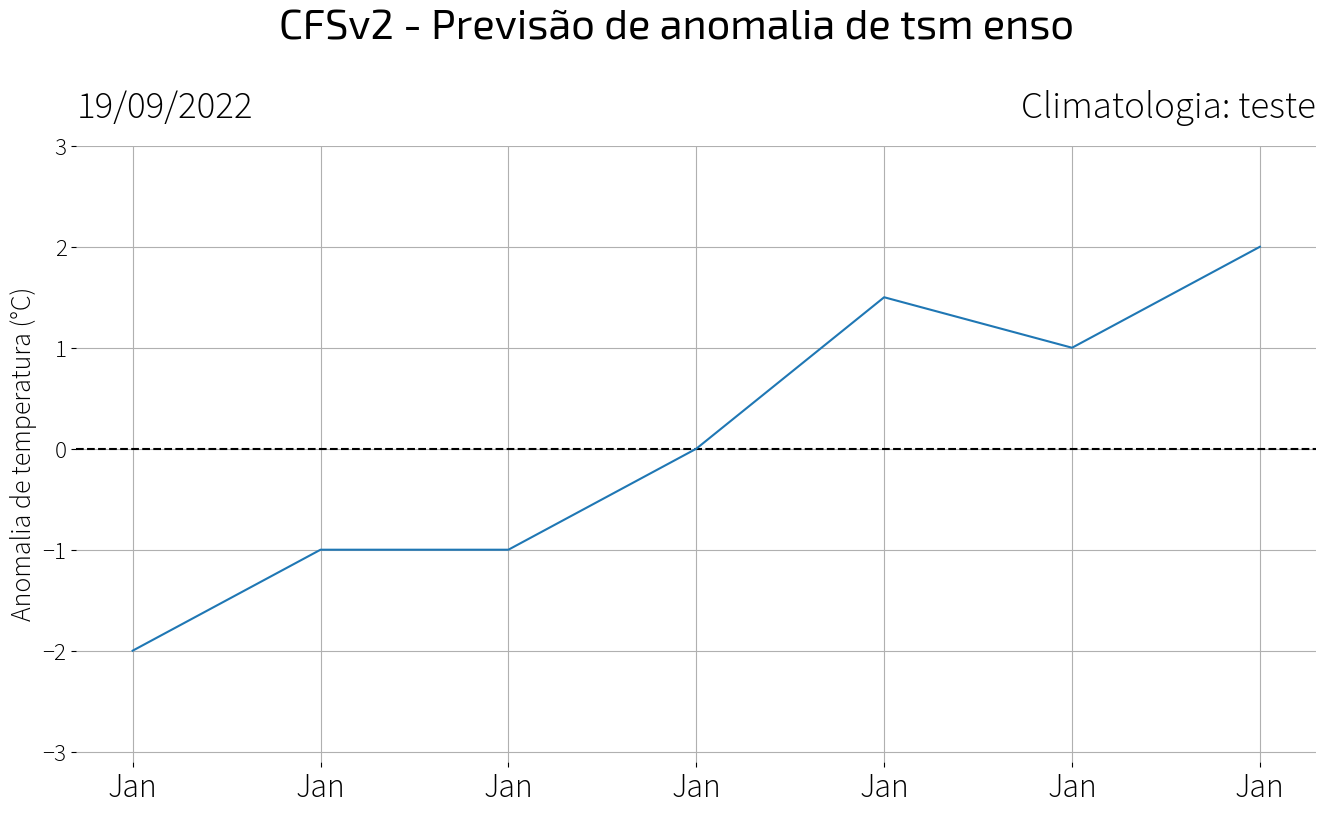

In [30]:
# Change the style of plot
#plt.style.use('seaborn-v0_8-whitegrid')
fonte_titulo = Path('fonts', "Exo2-VariableFont_wght.ttf")
fonte_outros = Path('fonts', "SourceSansPro-Light.ttf")
myfont1 = mpl.font_manager.FontProperties(fname=fonte_outros, size=24)
myFmt = mdates.DateFormatter('%b')

fig, ax = plt.subplots(figsize=(16,8))
ax.xaxis.set_major_formatter(myFmt)

plt.suptitle(f'CFSv2 - Previsão de anomalia de tsm enso', font=fonte_titulo, fontsize=30, y=1.05)
plt.title(f'19/09/2022', loc='left', font=fonte_outros, fontsize=28, pad=20)
plt.title(f'Climatologia: teste', loc='right', font=fonte_outros, fontsize=28, pad=20)
plt.xticks(font=fonte_outros, fontsize=24)
plt.yticks(font=fonte_outros, fontsize=18)
#plt.ylim(-3.1,3)
plt.axhline(y=0, color='#000000', linestyle='--')
plt.plot(x, y)
ax.set_ylabel('Anomalia de temperatura (°C)', fontsize=20, font=fonte_outros)
plt.grid()

for key, spine in ax.spines.items():
    spine.set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
#ax.spines['left'].set_visible(False)
plt.ylim(-3.1, 3)
#plt.legend(by_label.values(), by_label.keys(), prop=myfont1, loc='center', ncols=2, bbox_to_anchor=(0.5, -0.2))